In [1]:
# import sqlalchemy as db
import mysql.connector as db
import plotly.express as px
# import plotly.graph_objects as go
import pandas as pd

In [2]:
cn = db.connect(host='localhost',database='lns_finance',user='horace',password='Luv!270211')
# db_Info = connection.get_server_info()
# print("Connected to MySQL Server version ", db_Info)

In [10]:
cursor = cn.cursor()
query = ("select trans_month_num, trans_type, sum(trans_amount_php_abs) as amount from journal_view_1 where trans_year = %s group by 1,2 order by 1;")
current_year = 2021
cursor.execute(query, (current_year,))
rows = cursor.fetchall()

#for (trans_month_num, amount) in rows:
#    print("{}, {}".format(trans_month_num, amount))

In [11]:
# df = pd.DataFrame( [[ij for ij in i] for i in rows] )
df = pd.DataFrame(rows)
df.rename(columns={0: 'Month', 1: 'Type', 2: 'Amount'}, inplace=True);
print(df)

    Month     Type  Amount
0       1  Expense  677038
1       2  Expense  311389
2       3  Expense  894959
3       4  Expense  843600
4       5  Expense  509018
5       6  Expense  473369
6       7  Expense  231904
7       8  Expense  119690
8       9  Expense  209939
9      10  Expense  412206
10     11  Expense  107058
11     12  Expense  250546


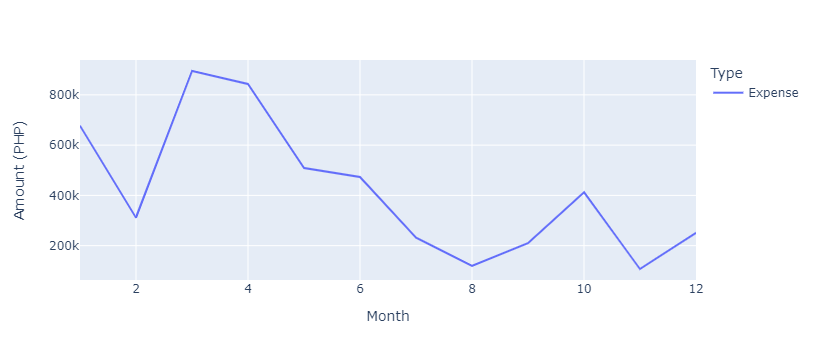

In [12]:
fig = px.line(df, x="Month", y="Amount", color="Type", hover_data=["Amount"], labels = {"Amount" : "Amount (PHP)"})
fig.show()